# Electronic Waste Notebook

This notebook is based on:
 
[1] Statistics Canada, “Table 38-10-0154-01  Electronic waste.” Statistics Canada, Jul. 18, 2022. doi: https://doi.org/10.25318/3810015401-eng. Available: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810015401&pickMembers%5B0%5D=1.21&cubeTimeFrame.startYear=2011&cubeTimeFrame.endYear=2021&referencePeriods=20110101%2C20210101

I set the city to be Montreal only. I use this notebook to plot interesting e-waste data for the city of Montreal.

**Problems**: This dataset contains cells that have certain special notations that I handle in different ways.
  - Cells that have a `..` in them indicate that the relevant data are not available for the reference period. I treat those as `NaN` values.
  - Cells that have a `E` after their value are to be used with caution, according to Statscan. For the purposes of demonstration, I treat those values at face-value and remove the `E` from the value.
  - Cells that have a `F` in them are too unreliable to be published, according to Statscan. I treat those as `NaN` values. 
     


In [1]:
from pathlib import Path
from re import sub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utilities import add_bar_labels

In [2]:
# Set the file path
file_path = Path('images/e_waste/')
file_path.mkdir(parents=True, exist_ok=True)

## Get all the data

In [3]:
# Read the data
e_waste = pd.read_csv('data/Electronic Waste.csv')
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of 2,20,20,25,22,19,16
1,Put unwanted computers in the garbage 3,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers 3,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


**Of these data, we want to focus on computers, printers, televisions, audiovisual equipment, cellular phones, landline telephones, microwave ovens, and electronic gaming equipment.**

In [4]:
# Clean up the Electronic waste column
e_waste['Electronic waste'] = e_waste['Electronic waste'].apply(lambda x: sub(f'\d+', '', x).strip())
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,F,F,F,F,F,F
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,F,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers,31E,19,F,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,F,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [5]:
# Replace all the `F` with `NaN`
e_waste = e_waste.replace('F', np.nan)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,NaN,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers,31E,19,NaN,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,NaN,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [6]:
# Replace all the `..` with `NaN`
e_waste = e_waste.replace('..', np.nan)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,NaN,12E,16E,21E,15E,6E
4,Donated or gave away unwanted computers,31E,19,NaN,9E,12E,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16E,23,22E,32,34,46
79,Returned unwanted mercury-containing lights to...,9E,13E,7E,NaN,8E,8E
80,Still had unwanted mercury-containing lights a...,15E,10E,15E,22E,16E,15


In [7]:
# Go through the year columns. Replace all the cells with an `E` with just the number in that cell
for col in e_waste.columns[1:]:
    e_waste[col] = e_waste[col].apply(lambda x: sub(r'(\d+)E', r'\1', x) if type(x) is str else x)
e_waste

,Electronic waste,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,NaN,12,16,21,15,6
4,Donated or gave away unwanted computers,31,19,NaN,9,12,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16,23,22,32,34,46
79,Returned unwanted mercury-containing lights to...,9,13,7,NaN,8,8
80,Still had unwanted mercury-containing lights a...,15,10,15,22,16,15


In [8]:
# Rename the first column
e_waste = e_waste.rename(columns={"Electronic waste": "field"})
e_waste

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20,20,25,22,19,16
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30,30,41,44,50,67
3,Returned unwanted computers to a supplier or r...,NaN,12,16,21,15,6
4,Donated or gave away unwanted computers,31,19,NaN,9,12,16
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55,49,51,42,45,37
78,Took or sent unwanted mercury-containing light...,16,23,22,32,34,46
79,Returned unwanted mercury-containing lights to...,9,13,7,NaN,8,8
80,Still had unwanted mercury-containing lights a...,15,10,15,22,16,15


In [9]:
# Ensure the proper types
e_waste = e_waste.astype(
    {'2011': float, '2013': float,
     '2015': float, '2017': float,
     '2019': float, '2021': float}
)
e_waste

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Put unwanted computers in the garbage,NaN,NaN,NaN,NaN,NaN,NaN
2,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
3,Returned unwanted computers to a supplier or r...,NaN,12.0,16.0,21.0,15.0,6.0
4,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
...,...,...,...,...,...,...,...
77,Put unwanted mercury-containing lights in the ...,55.0,49.0,51.0,42.0,45.0,37.0
78,Took or sent unwanted mercury-containing light...,16.0,23.0,22.0,32.0,34.0,46.0
79,Returned unwanted mercury-containing lights to...,9.0,13.0,7.0,NaN,8.0,8.0
80,Still had unwanted mercury-containing lights a...,15.0,10.0,15.0,22.0,16.0,15.0


## Process the computer-related data only

In [10]:
# Get only the computer-related data points
computers = e_waste[
    (e_waste['field'].str.contains('computers')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

computers

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted computers to dispose of,20.0,20.0,25.0,22.0,19.0,16.0
1,Took or sent unwanted computers to a depot or ...,30.0,30.0,41.0,44.0,50.0,67.0
2,Returned unwanted computers to a supplier or r...,NaN,12.0,16.0,21.0,15.0,6.0
3,Donated or gave away unwanted computers,31.0,19.0,NaN,9.0,12.0,16.0
4,Still had unwanted computers at the time of in...,28.0,34.0,26.0,29.0,27.0,23.0


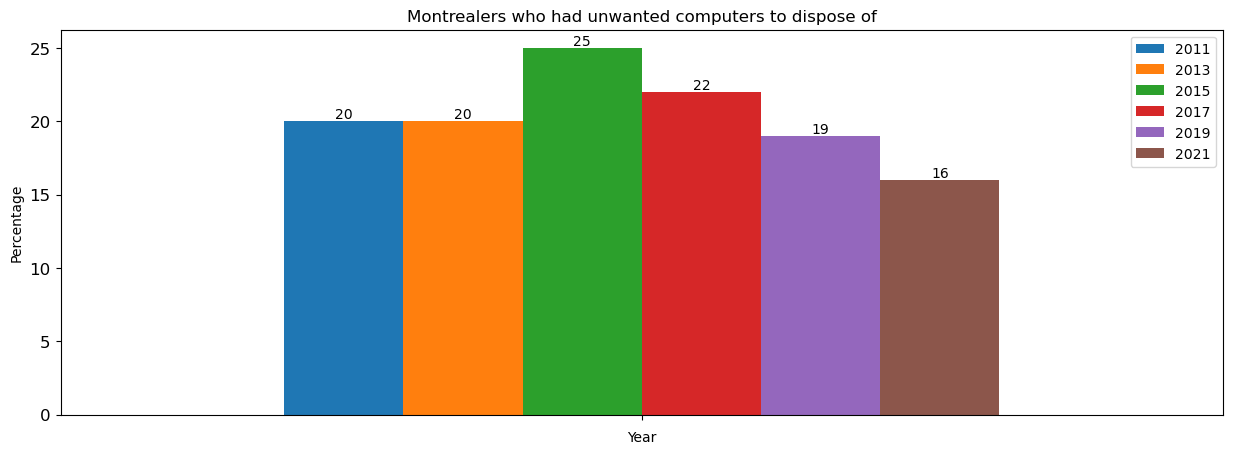

In [11]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted computers to dispose of
had_unwanted = computers[computers['field'] == 'Had unwanted computers to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted computers to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / "computers_main_plot.png")

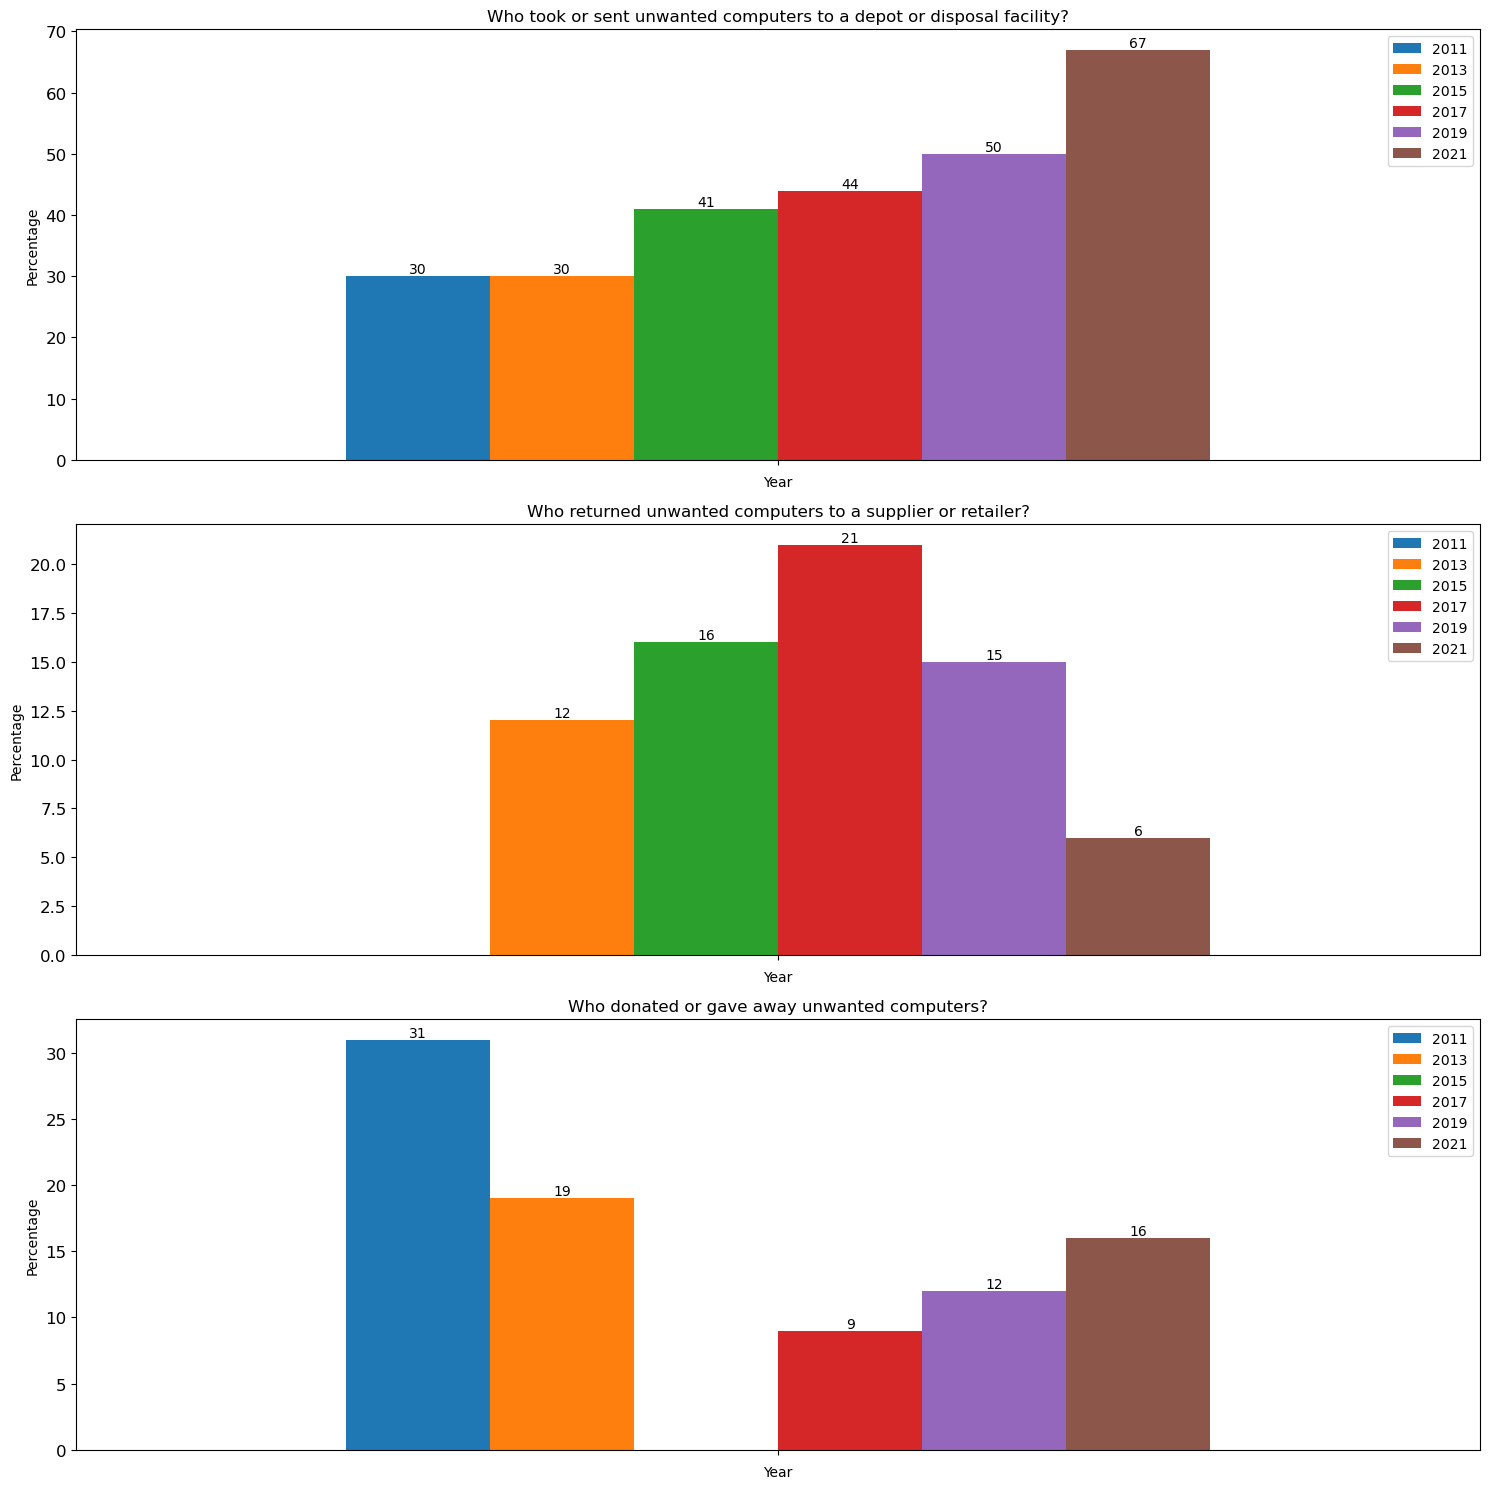

In [12]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted computers to a depot or disposal facility
took_or_sent = computers[computers['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted computers to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who returned unwanted computers to a supplier or retailer
computers_returned = computers[computers['field'].str.contains('Returned unwanted')].iloc[:, 1:]
computers_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted computers to a supplier or retailer?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who donated or gave away unwanted computers
computers_donated = computers[computers['field'].str.contains('Donated or gave away')].iloc[:, 1:]
computers_donated.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who donated or gave away unwanted computers?')
add_bar_labels(ax4)

# # Plot 5: Bar graph for Montrealers who still had unwanted computers at the time of interview
# computers_still = computers[computers['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# computers_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
# ax5.set_xticklabels('')
# ax5.set_xlabel('Year')
# ax5.set_ylabel('Percentage')
# ax5.set_title('Who still had unwanted computers at the time of interview?')
# add_bar_labels(ax5)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(311)

# Save the combined plot
fig2.savefig(file_path / 'computers_combined_plot.png')

## Process the printer-related data only

In [13]:
# Get only the printer-related data points
printers = e_waste[
    (e_waste['field'].str.contains('printers')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

printers

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted printers to dispose of,11.0,14.0,15.0,16.0,13.0,11.0
1,Put unwanted printers in the garbage,NaN,16.0,NaN,NaN,NaN,NaN
2,Took or sent unwanted printers to a depot or d...,25.0,29.0,41.0,52.0,62.0,63.0
3,Returned unwanted printers to a supplier or re...,NaN,16.0,18.0,22.0,NaN,NaN
4,Donated or gave away unwanted printers,33.0,20.0,NaN,10.0,NaN,14.0
5,Still had unwanted printers at the time of int...,20.0,23.0,17.0,16.0,20.0,18.0


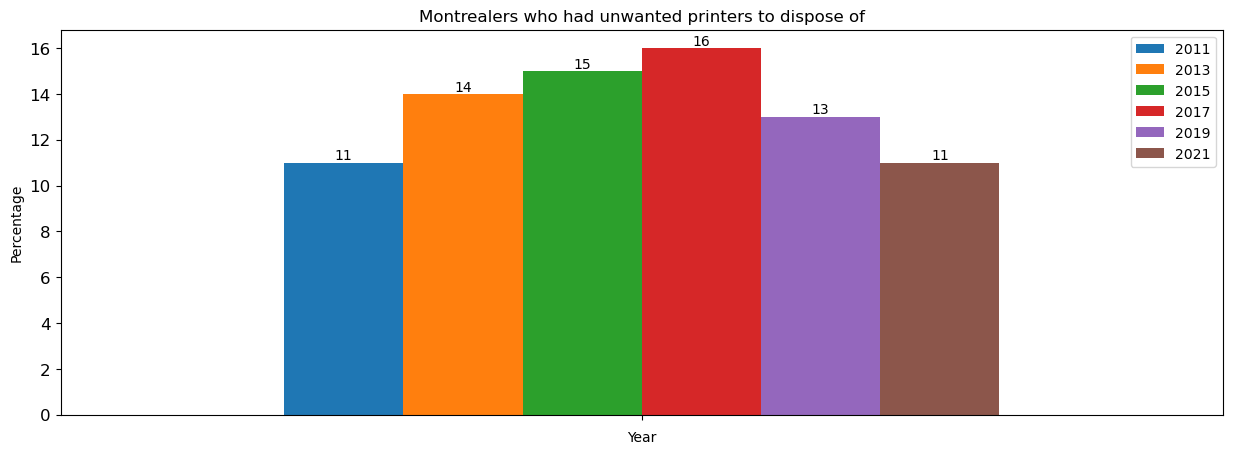

In [14]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted printers to dispose of
had_unwanted = printers[printers['field'] == 'Had unwanted printers to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted printers to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'printers_main_plot.png')

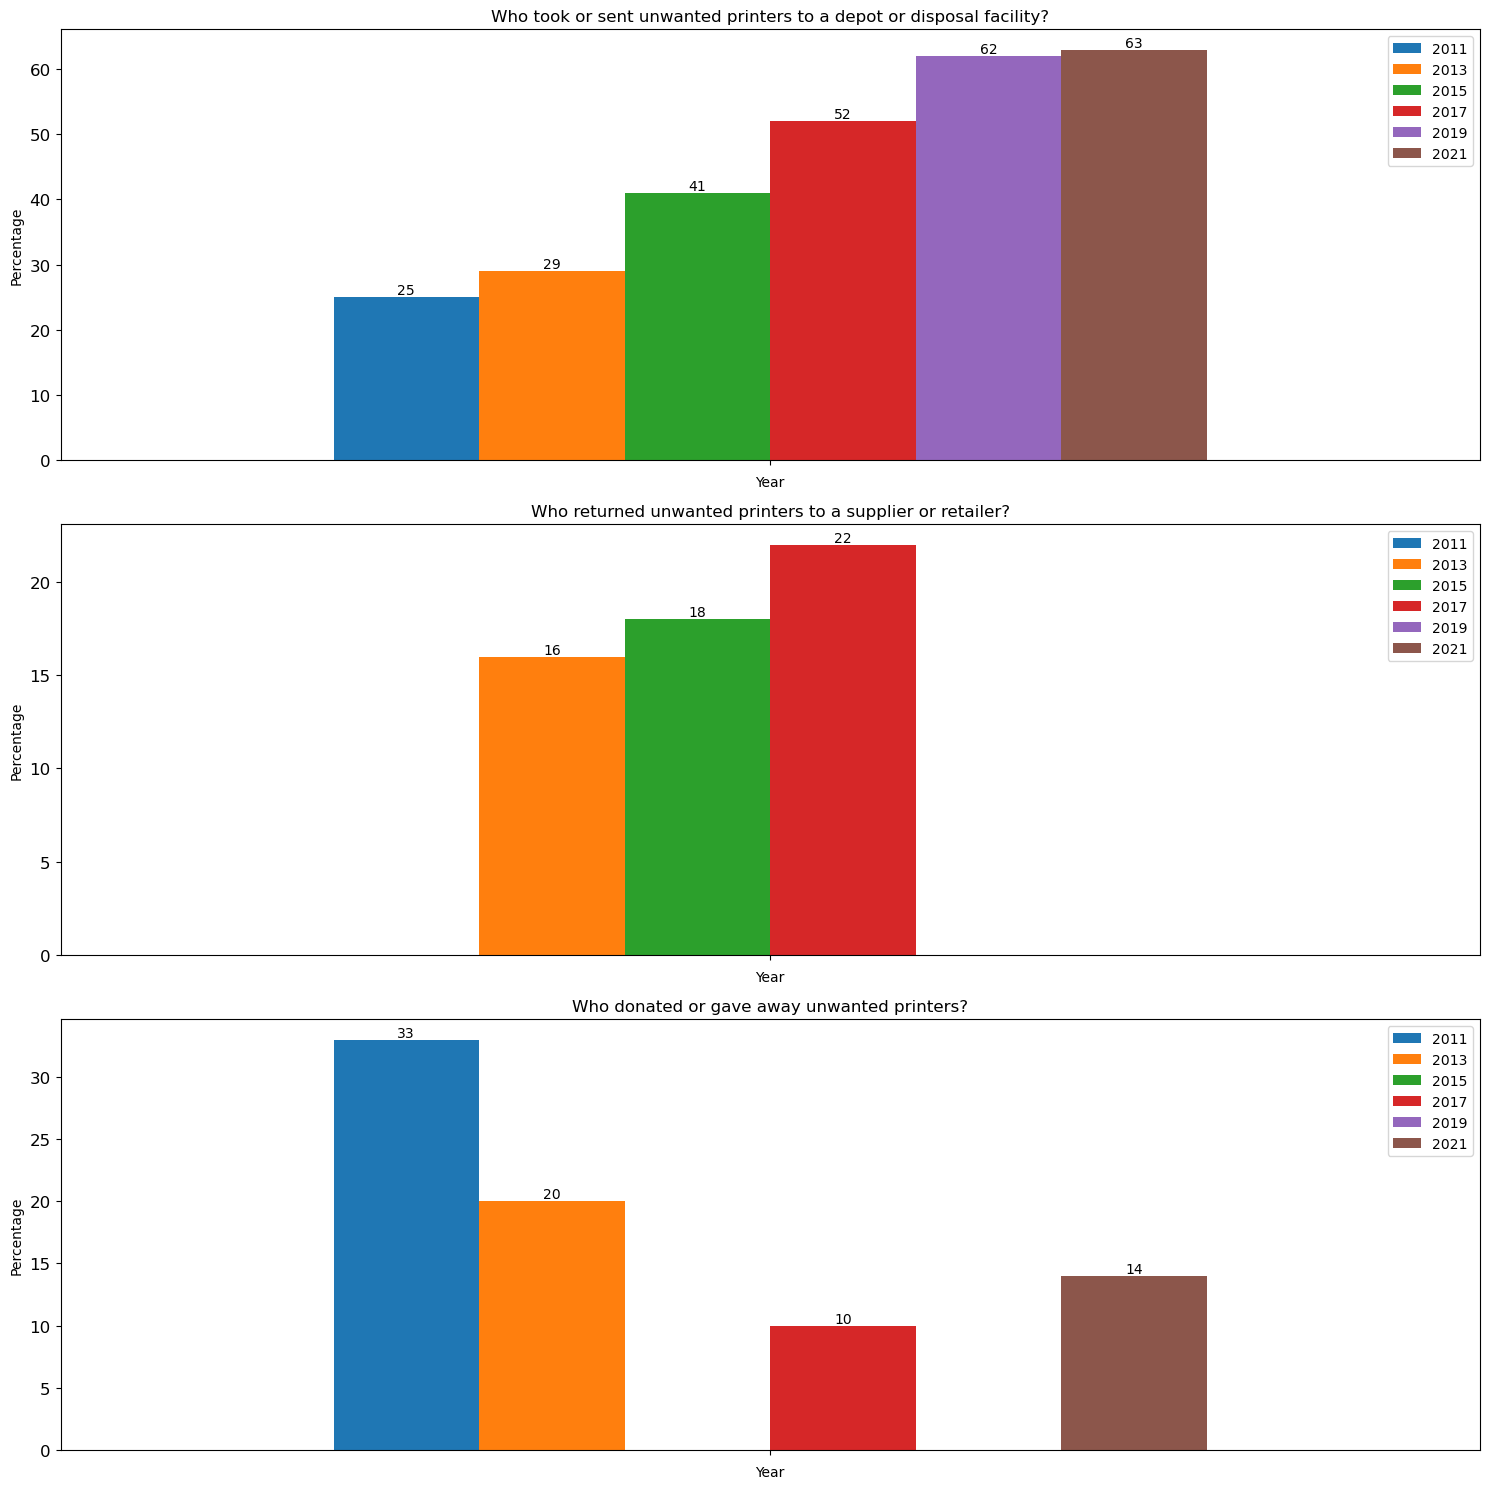

In [15]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted printers to a depot or disposal facility
took_or_sent = printers[printers['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted printers to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who returned unwanted printers to a supplier or retailer
printers_returned = printers[printers['field'].str.contains('Returned unwanted')].iloc[:, 1:]
printers_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted printers to a supplier or retailer?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who donated or gave away unwanted printers
printers_donated = printers[printers['field'].str.contains('Donated or gave away')].iloc[:, 1:]
printers_donated.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who donated or gave away unwanted printers?')
add_bar_labels(ax4)

# # Plot 5: Bar graph for Montrealers who still had unwanted printers at the time of interview
# printers_still = printers[printers['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# printers_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
# ax5.set_xticklabels('')
# ax5.set_xlabel('Year')
# ax5.set_ylabel('Percentage')
# ax5.set_title('Who still had unwanted printers at the time of interview?')
# add_bar_labels(ax5)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(311)

# Save the combined plot
fig2.savefig(file_path / 'printers_combined_plot.png')

## Process the television-related data only

In [16]:
# Get only the television-related data points
televisions = e_waste[
    (e_waste['field'].str.contains('televisions')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

televisions

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted televisions to dispose of,22.0,20.0,25.0,22.0,15.0,14.0
1,Put unwanted televisions in the garbage,11.0,12.0,NaN,NaN,NaN,NaN
2,Took or sent unwanted televisions to a depot o...,24.0,34.0,47.0,49.0,66.0,59.0
3,Returned unwanted televisions to a supplier or...,NaN,7.0,9.0,16.0,10.0,6.0
4,Donated or gave away unwanted televisions,41.0,27.0,20.0,13.0,NaN,20.0
5,Still had unwanted televisions at the time of ...,21.0,22.0,14.0,17.0,14.0,18.0


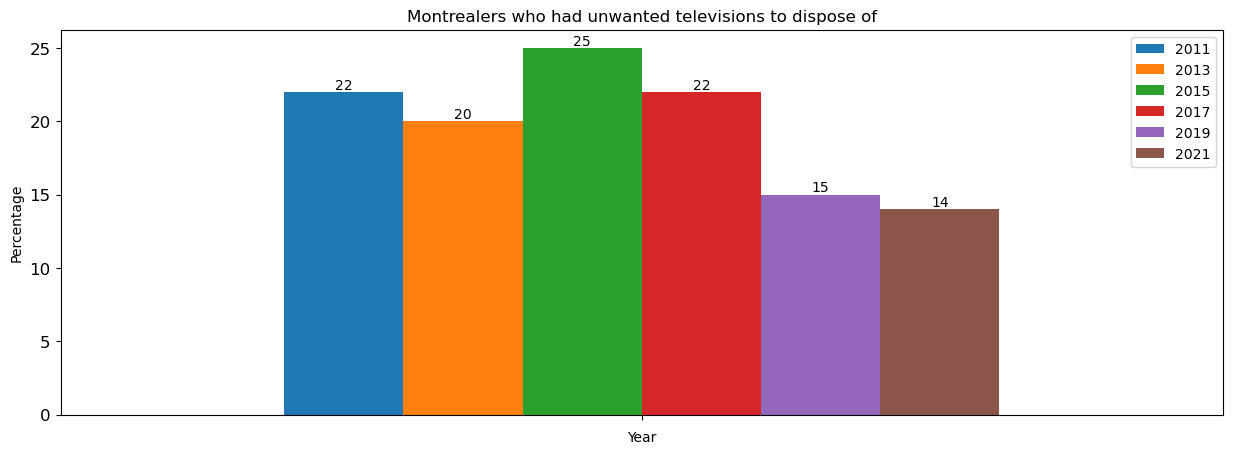

In [17]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted televisions to dispose of
had_unwanted = televisions[televisions['field'] == 'Had unwanted televisions to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted televisions to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'televisions_main_plot.png')

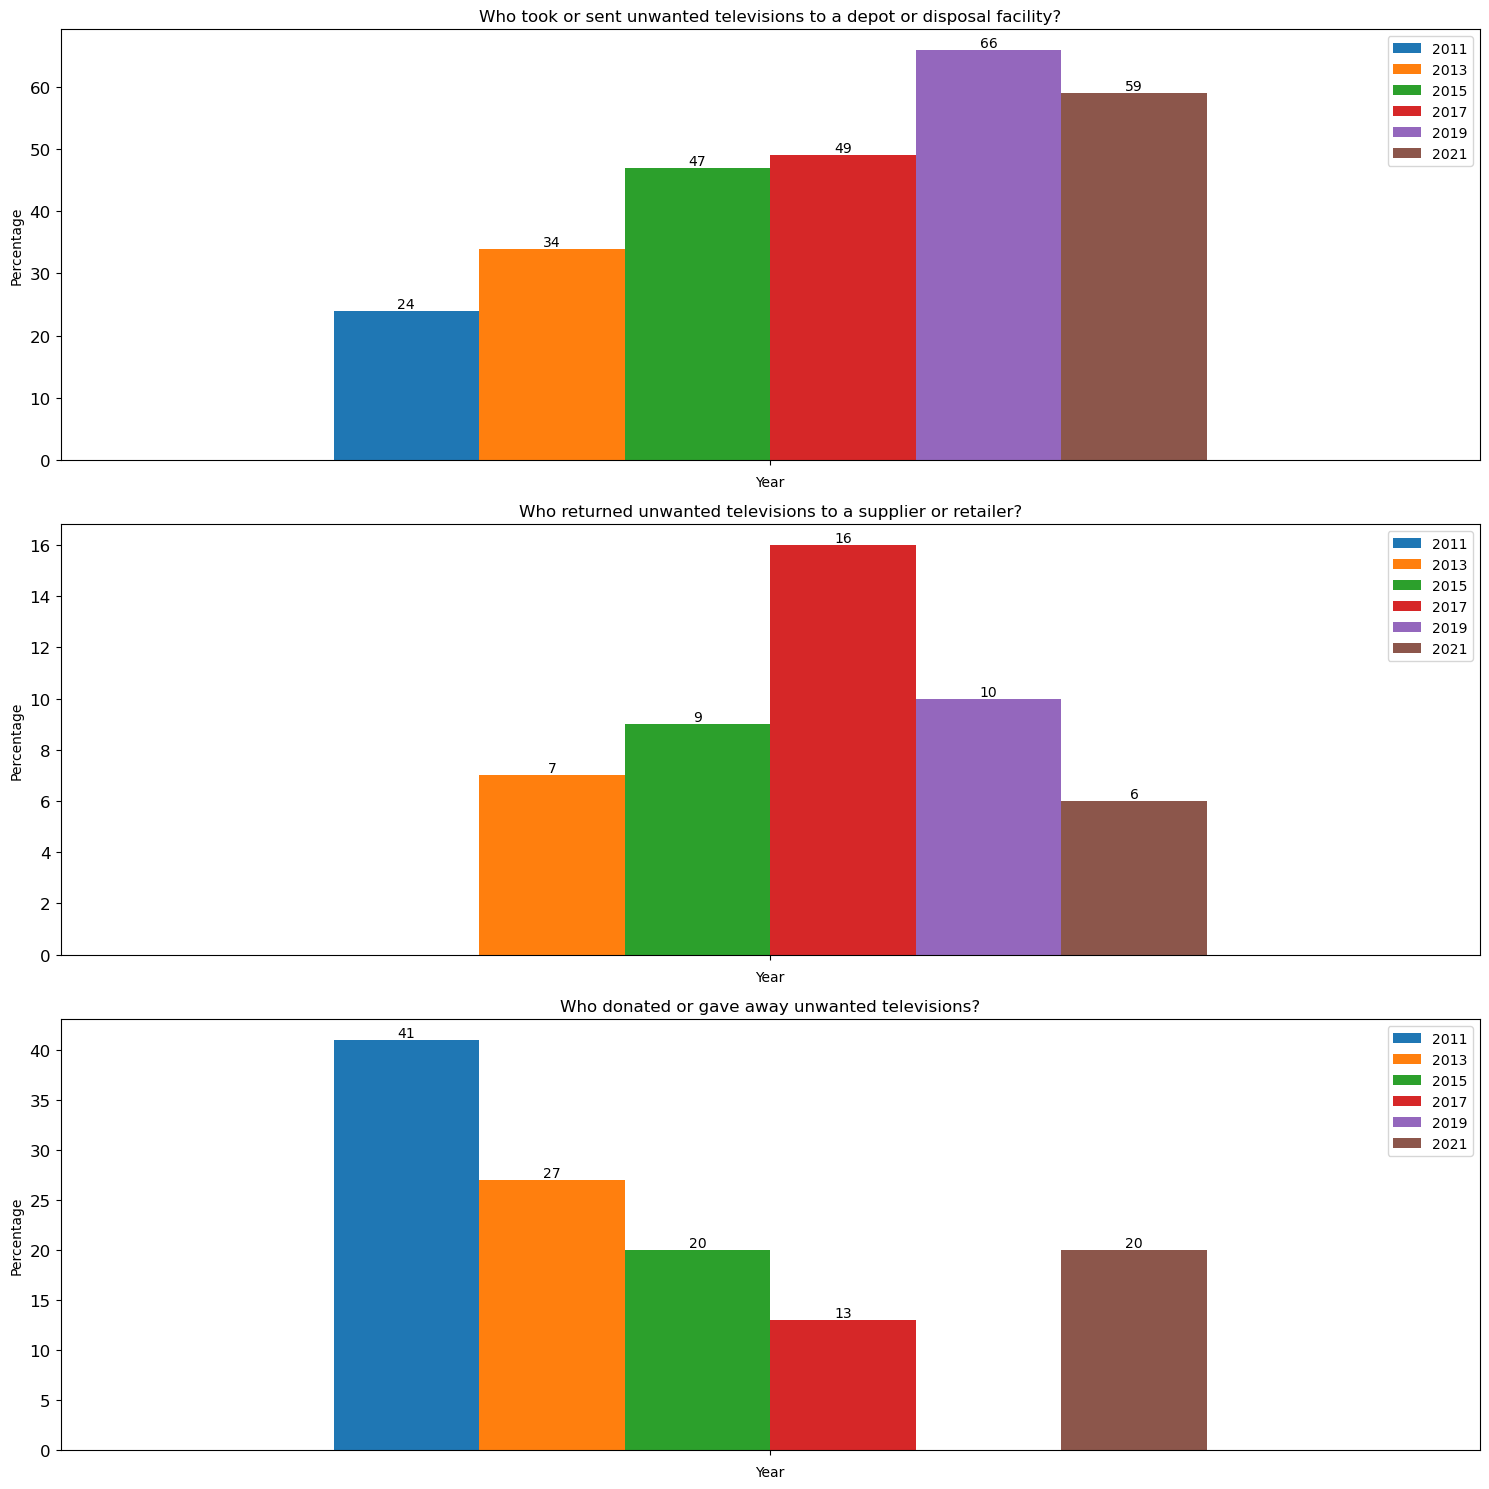

In [18]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted televisions to a depot or disposal facility
took_or_sent = televisions[televisions['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted televisions to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who returned unwanted televisions to a supplier or retailer
televisions_returned = televisions[televisions['field'].str.contains('Returned unwanted')].iloc[:, 1:]
televisions_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted televisions to a supplier or retailer?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who donated or gave away unwanted televisions
televisions_donated = televisions[televisions['field'].str.contains('Donated or gave away')].iloc[:, 1:]
televisions_donated.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who donated or gave away unwanted televisions?')
add_bar_labels(ax4)

# # Plot 5: Bar graph for Montrealers who still had unwanted televisions at the time of interview
# televisions_still = televisions[televisions['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# televisions_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
# ax5.set_xticklabels('')
# ax5.set_xlabel('Year')
# ax5.set_ylabel('Percentage')
# ax5.set_title('Who still had unwanted televisions at the time of interview?')
# add_bar_labels(ax5)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(311)

# Save the combined plot
fig2.savefig(file_path / 'televisions_combined_plot.png')

## Process the audio-visual-equipment-related data only

In [19]:
# Get only the audio-visual-equipment-related data points
audio_visual_equipment = e_waste[
    (e_waste['field'].str.contains('audio visual equipment')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

audio_visual_equipment

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted audio visual equipment to dispose of,9.0,10.0,8.0,13.0,12.0,11.0
1,Took or sent unwanted audio visual equipment t...,27.0,35.0,55.0,44.0,62.0,65.0
2,Donated or gave away unwanted audio visual equ...,28.0,17.0,NaN,NaN,NaN,11.0
3,Still had unwanted audio visual equipment at t...,NaN,32.0,NaN,21.0,21.0,24.0


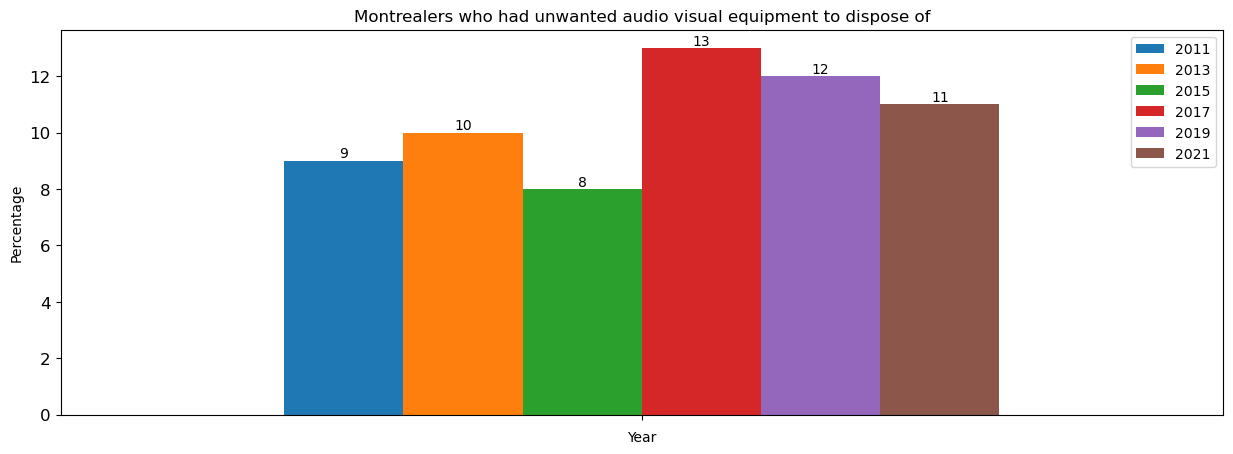

In [20]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted audiovisual equipment to dispose of
had_unwanted = audio_visual_equipment[audio_visual_equipment['field'] == 'Had unwanted audio visual equipment to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted audio visual equipment to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'audio_visual_equipment_main_plot.png')


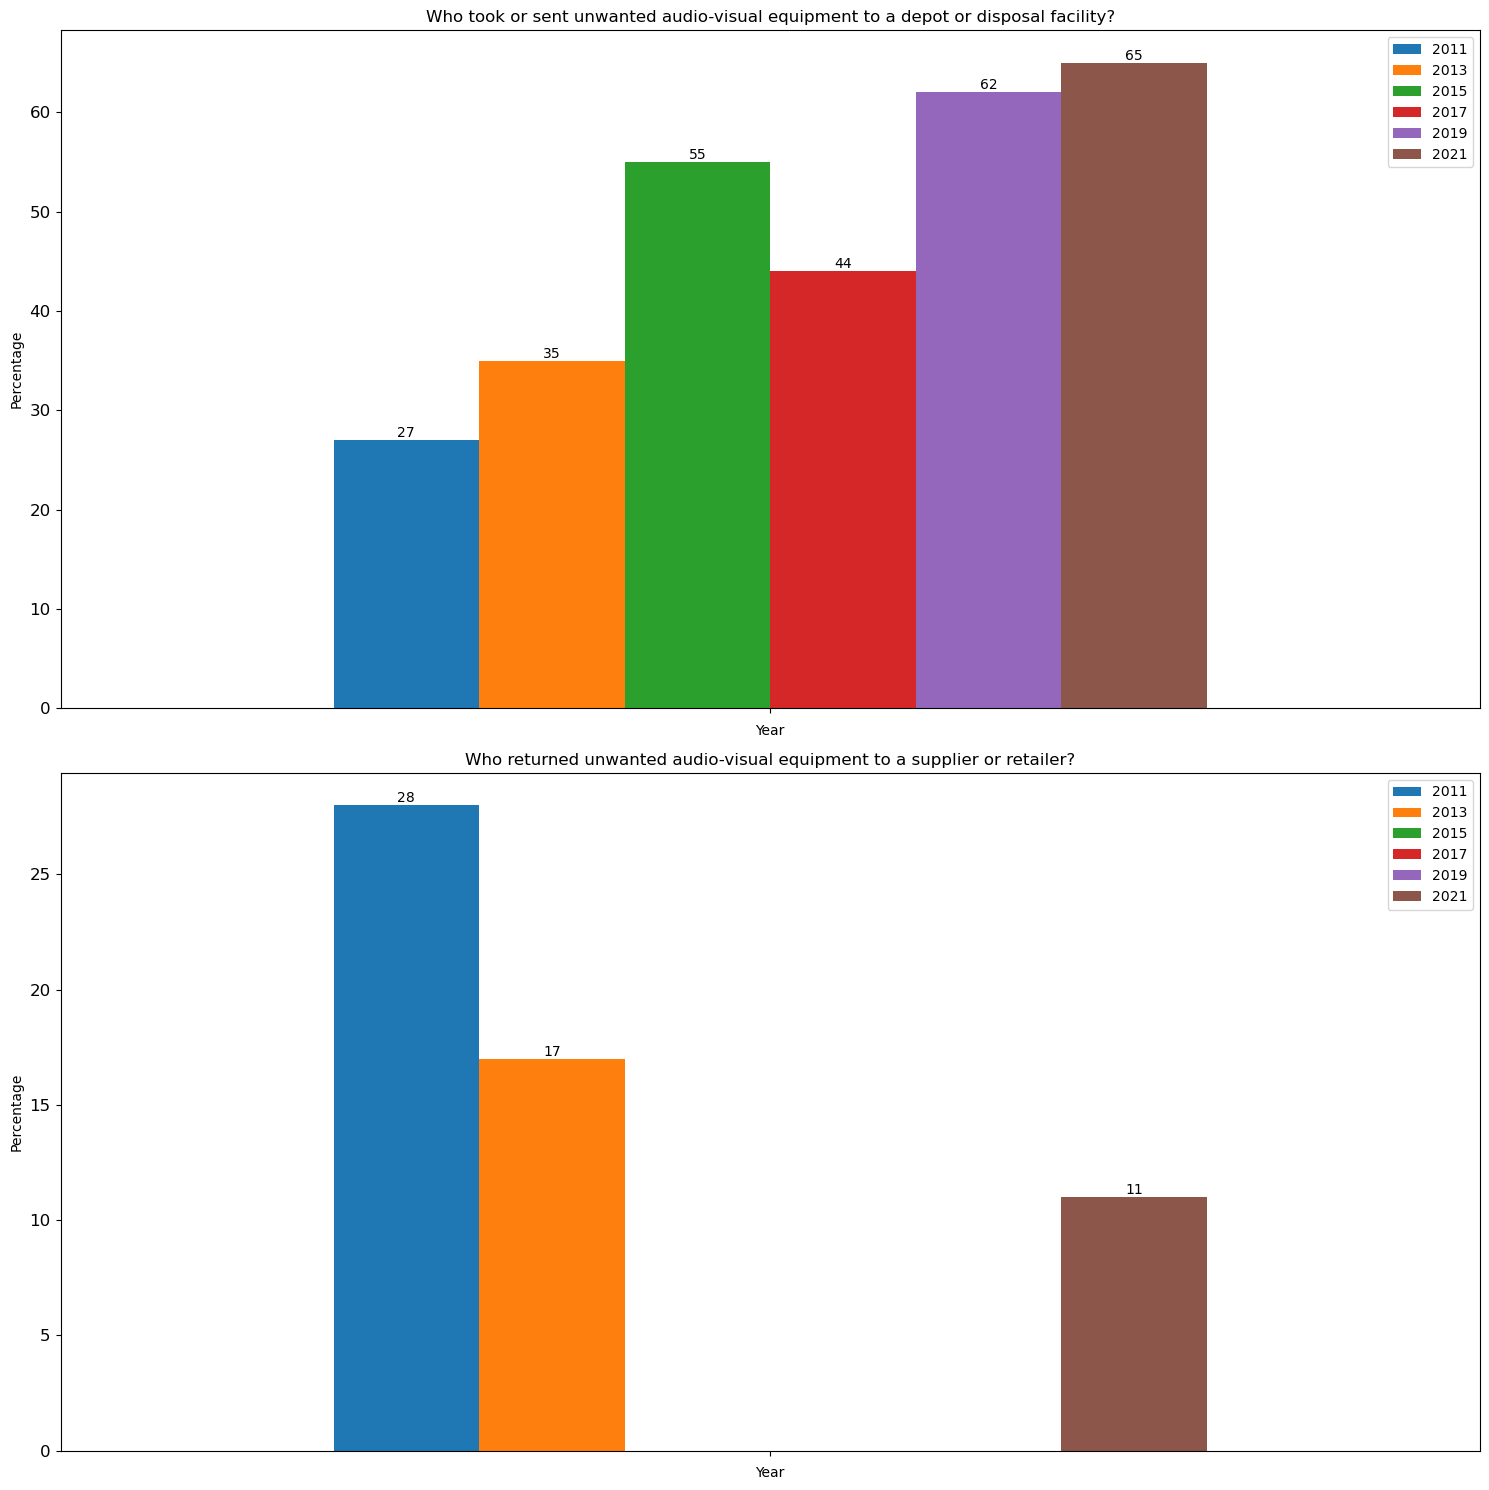

In [21]:
# Create subplots for Plots 2 to 4
fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted audiovisual equipment to a depot or disposal facility
took_or_sent = audio_visual_equipment[audio_visual_equipment['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted audio-visual equipment to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who donated or gave away unwanted audiovisual equipment
audio_visual_equipment_returned = audio_visual_equipment[audio_visual_equipment['field'].str.contains('Donated or gave away')].iloc[:, 1:]
audio_visual_equipment_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted audio-visual equipment to a supplier or retailer?')
add_bar_labels(ax3)

# # Plot 4: Bar graph for Montrealers who still had unwanted audiovisual equipment at the time of interview
# audio_visual_equipment_still = audio_visual_equipment[audio_visual_equipment['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# audio_visual_equipment_still.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
# ax4.set_xticklabels('')
# ax4.set_xlabel('Year')
# ax4.set_ylabel('Percentage')
# ax4.set_title('Who still had unwanted audio-visual equipment at the time of interview?')
# add_bar_labels(ax4)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(211)

# Save the combined plot
fig2.savefig(file_path / 'audio_visual_equipment_combined_plot.png')

## Process the cellular-phone-related data only

In [22]:
# Get only the cellular-phone-related data points
cellular_phone = e_waste[
    (e_waste['field'].str.contains('cellular phone')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

cellular_phone

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted cellular phones to dispose of,20.0,18.0,18.0,20.0,20.0,17.0
1,Took or sent unwanted cellular phones to a dep...,20.0,16.0,31.0,31.0,35.0,44.0
2,Returned unwanted cellular phones to a supplie...,21.0,24.0,18.0,21.0,17.0,12.0
3,Donated or gave away unwanted cellular phones,NaN,NaN,NaN,10.0,11.0,13.0
4,Still had unwanted cellular phones at the time...,47.0,51.0,38.0,35.0,36.0,35.0


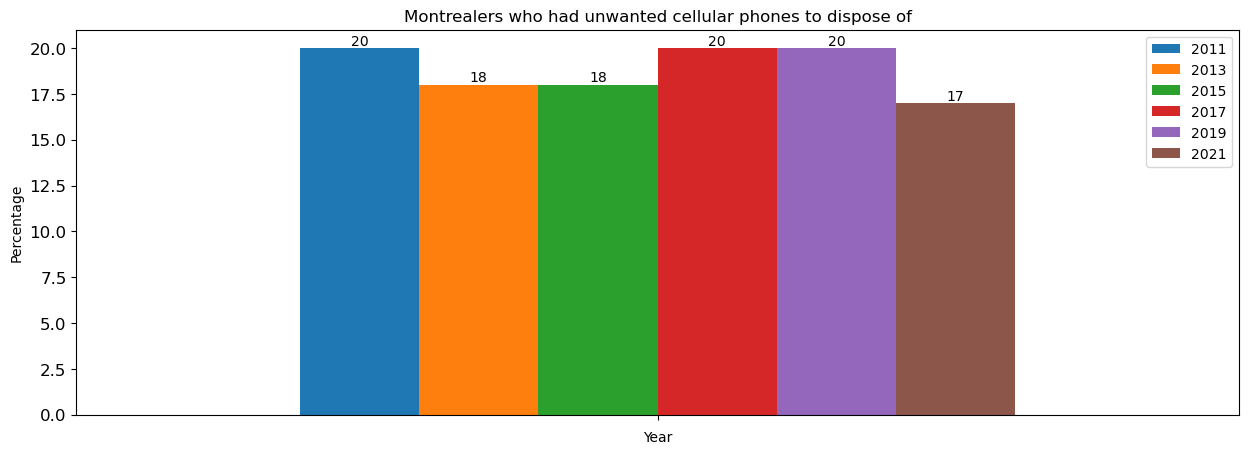

In [23]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted cellular phones to dispose of
had_unwanted = cellular_phone[cellular_phone['field'] == 'Had unwanted cellular phones to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted cellular phones to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'cellular_phone_main_plot.png')

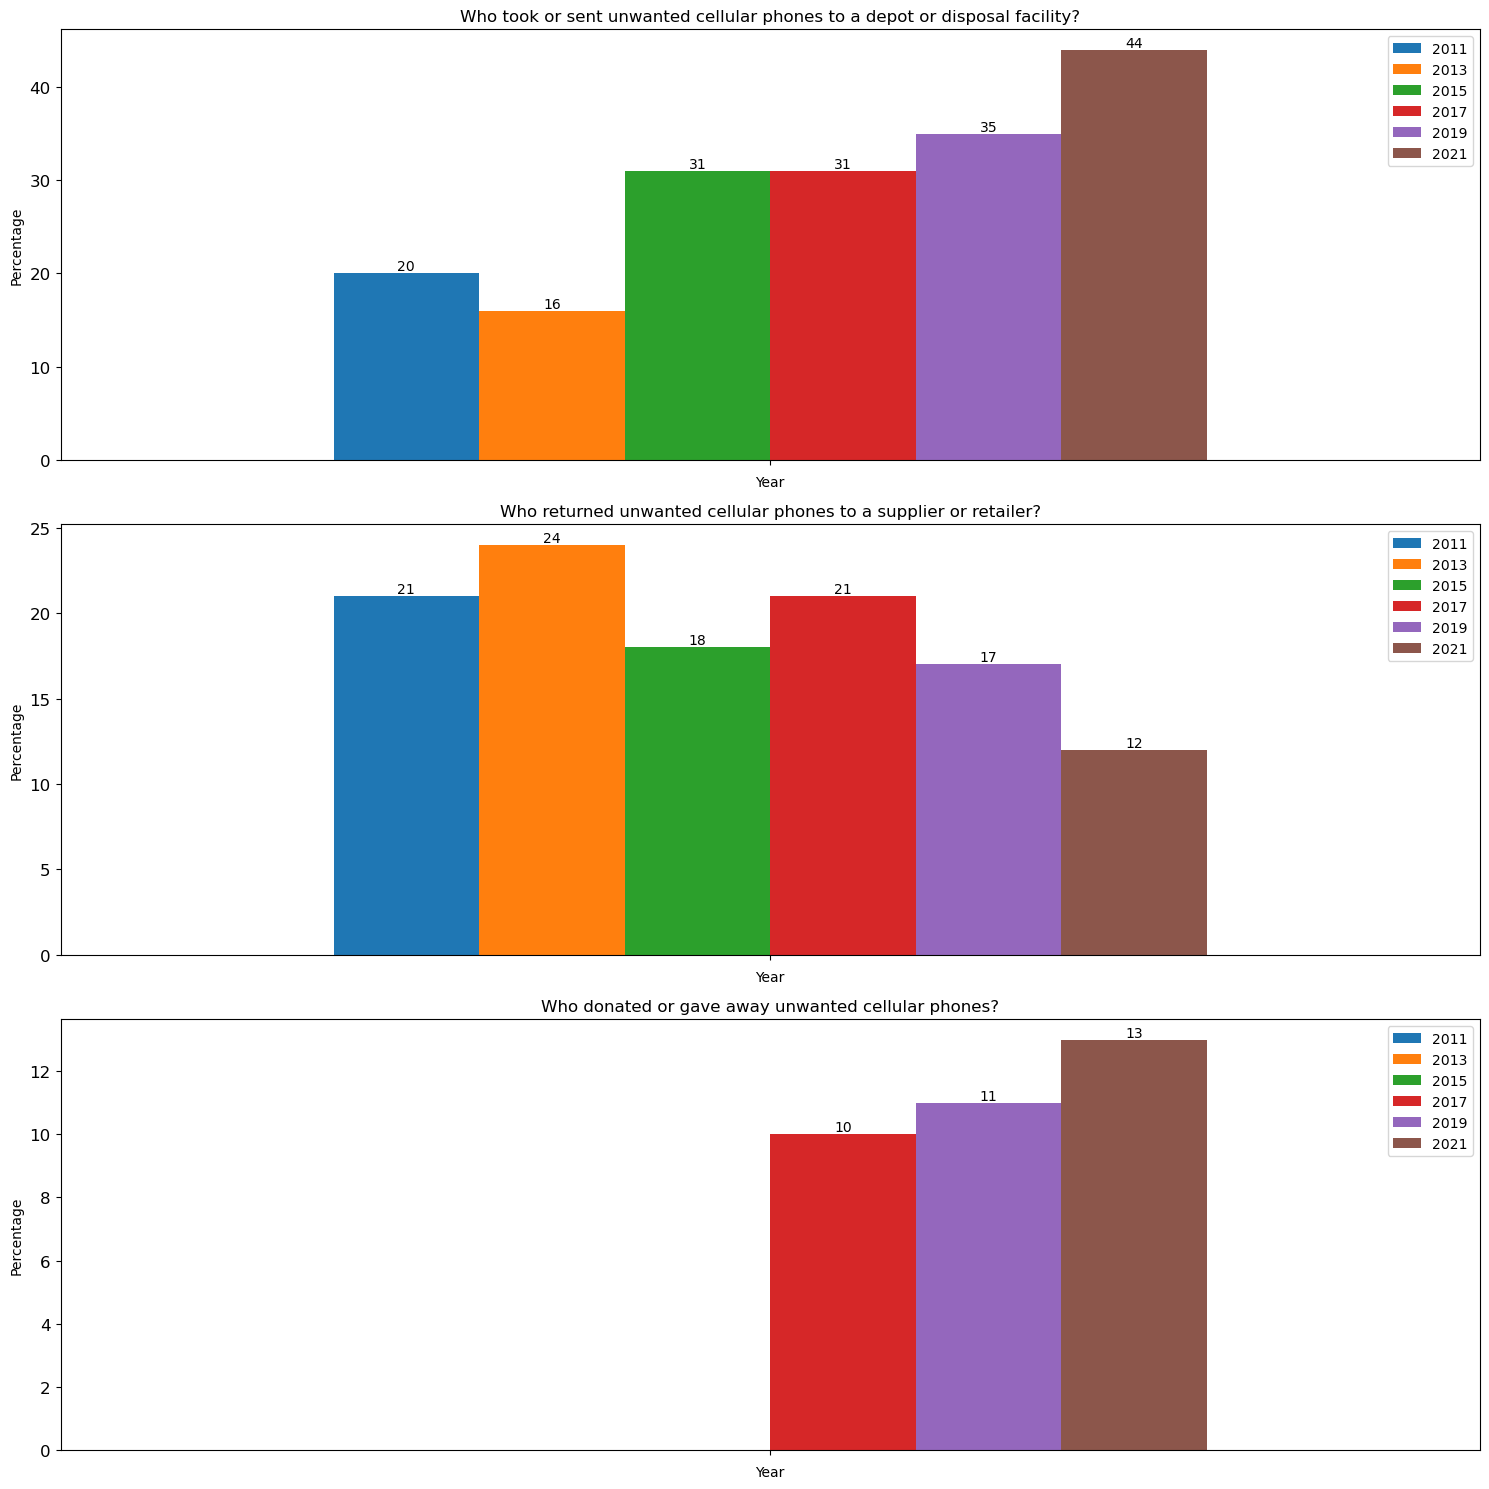

In [24]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(15, 15))

# Plot 2: Bar graph for Montrealers who took or sent unwanted cellular phones to a depot or disposal facility
took_or_sent = cellular_phone[cellular_phone['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted cellular phones to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who returned unwanted cellular phones to a supplier or retailer
cellular_phones_returned = cellular_phone[cellular_phone['field'].str.contains('Returned unwanted')].iloc[:, 1:]
cellular_phones_returned.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who returned unwanted cellular phones to a supplier or retailer?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who donated or gave away unwanted cellular phones
cellular_phones_donated = cellular_phone[cellular_phone['field'].str.contains('Donated or gave away')].iloc[:, 1:]
cellular_phones_donated.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who donated or gave away unwanted cellular phones?')
add_bar_labels(ax4)

# # Plot 5: Bar graph for Montrealers who still had unwanted cellular phones at the time of interview
# cellular_phones_still = cellular_phone[cellular_phone['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# cellular_phones_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
# ax5.set_xticklabels('')
# ax5.set_xlabel('Year')
# ax5.set_ylabel('Percentage')
# ax5.set_title('Who still had unwanted cellular phones at the time of interview?')
# add_bar_labels(ax5)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(311)

# Save the combined plot
fig2.savefig(file_path / 'cellular_phone_combined_plot.png')

## Process the landline-telephone-related data only

In [25]:
# Get only the landline-telephone-related data points
landline_telephone = e_waste[
    (e_waste['field'].str.contains('landline telephone')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

landline_telephone

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted landline telephones to dispose of,NaN,NaN,NaN,8.0,6.0,6.0
1,Took or sent unwanted landline telephones to a...,NaN,NaN,NaN,32.0,52.0,45.0
2,Still had unwanted landline telephones at the ...,NaN,NaN,NaN,33.0,30.0,29.0


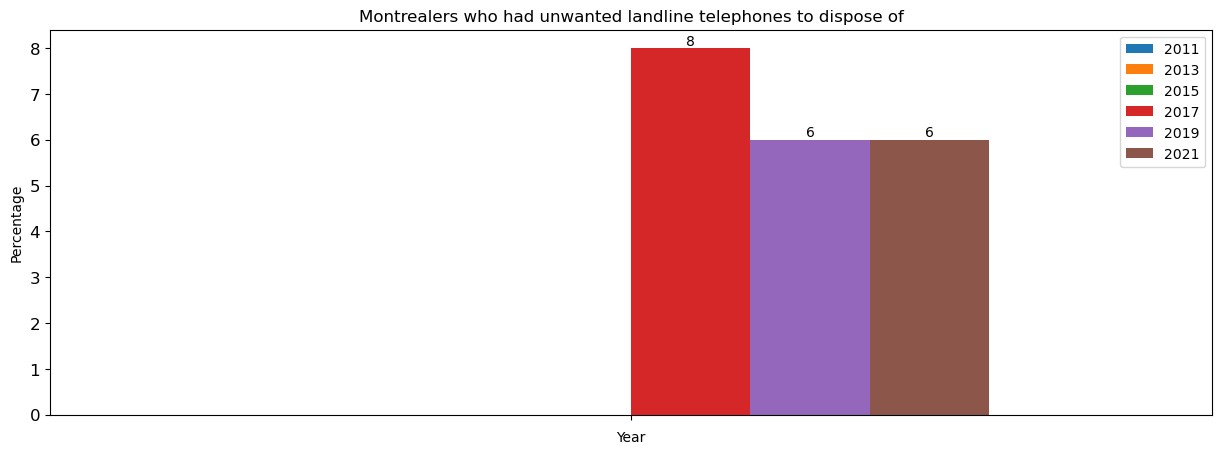

In [26]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted landline telephones to dispose of
had_unwanted = landline_telephone[landline_telephone['field'] == 'Had unwanted landline telephones to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted landline telephones to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'landline_telephone_main_plot.png')

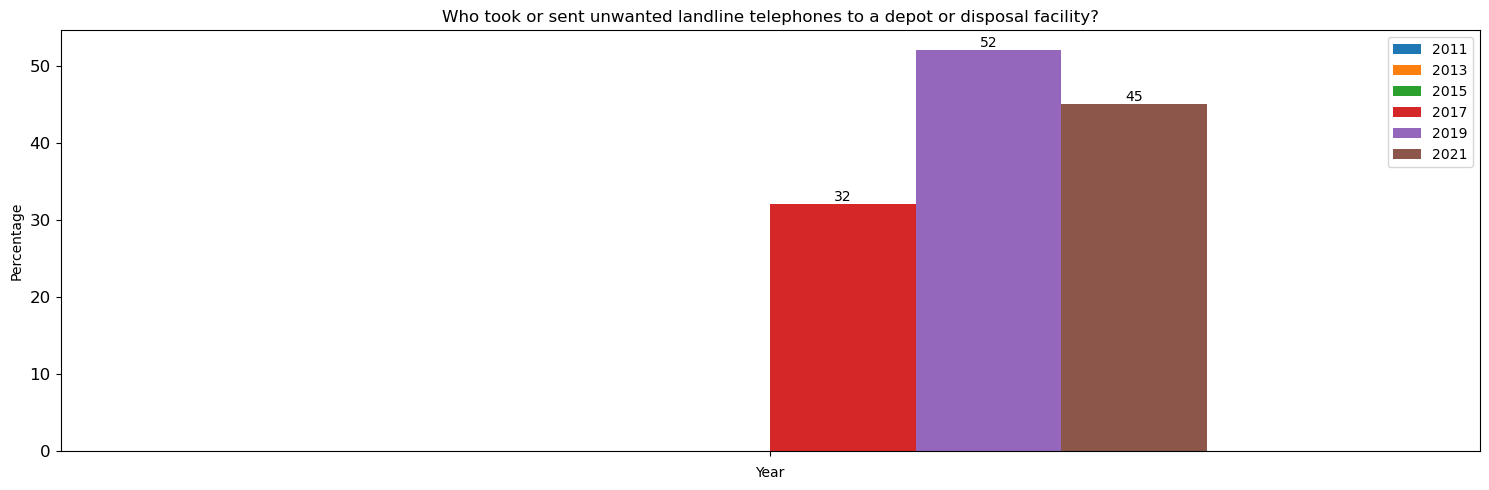

In [27]:
# Create subplots for Plots 2 to 3
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 5))

# Plot 2: Bar graph for Montrealers who took or sent unwanted landline telephones to a depot or disposal facility
took_or_sent = landline_telephone[landline_telephone['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted landline telephones to a depot or disposal facility?')
add_bar_labels(ax2)

# # Plot 3: Bar graph for Montrealers who still had unwanted landline phones at the time of interview
# landline_telephone_still = landline_telephone[landline_telephone['field'].str.contains('Still had unwanted')].iloc[:, 1:]
# landline_telephone_still.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
# ax3.set_xticklabels('')
# ax3.set_xlabel('Year')
# ax3.set_ylabel('Percentage')
# ax3.set_title('Who still had unwanted landline phones at the time of interview?')
# add_bar_labels(ax3)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(111)

# Save the combined plot
fig2.savefig(file_path / 'landline_telephone_combined_plot.png')

## Process the microwave-oven-related data only

In [28]:
# Get only the microwave-oven-related data points
microwave_oven = e_waste[
    (e_waste['field'].str.contains('microwave oven')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

microwave_oven

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted microwave ovens to dispose of,NaN,NaN,NaN,6.0,6.0,5.0
1,Took or sent unwanted microwave ovens to a dep...,NaN,NaN,NaN,34.0,48.0,45.0
2,Donated or gave away unwanted microwave ovens,NaN,NaN,NaN,22.0,NaN,24.0


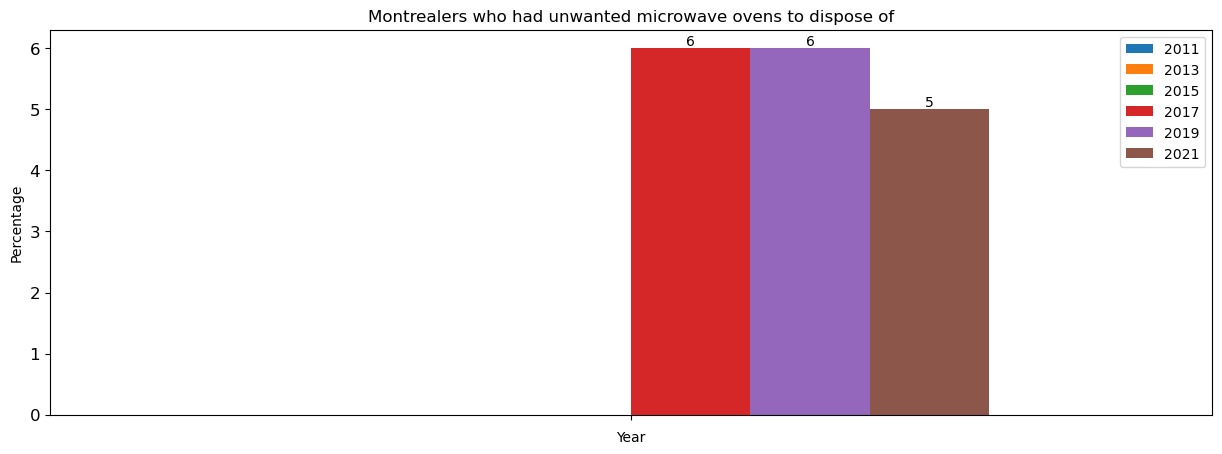

In [29]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted microwave ovens to dispose of
had_unwanted = microwave_oven[microwave_oven['field'] == 'Had unwanted microwave ovens to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted microwave ovens to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'microwave_oven_main_plot.png')

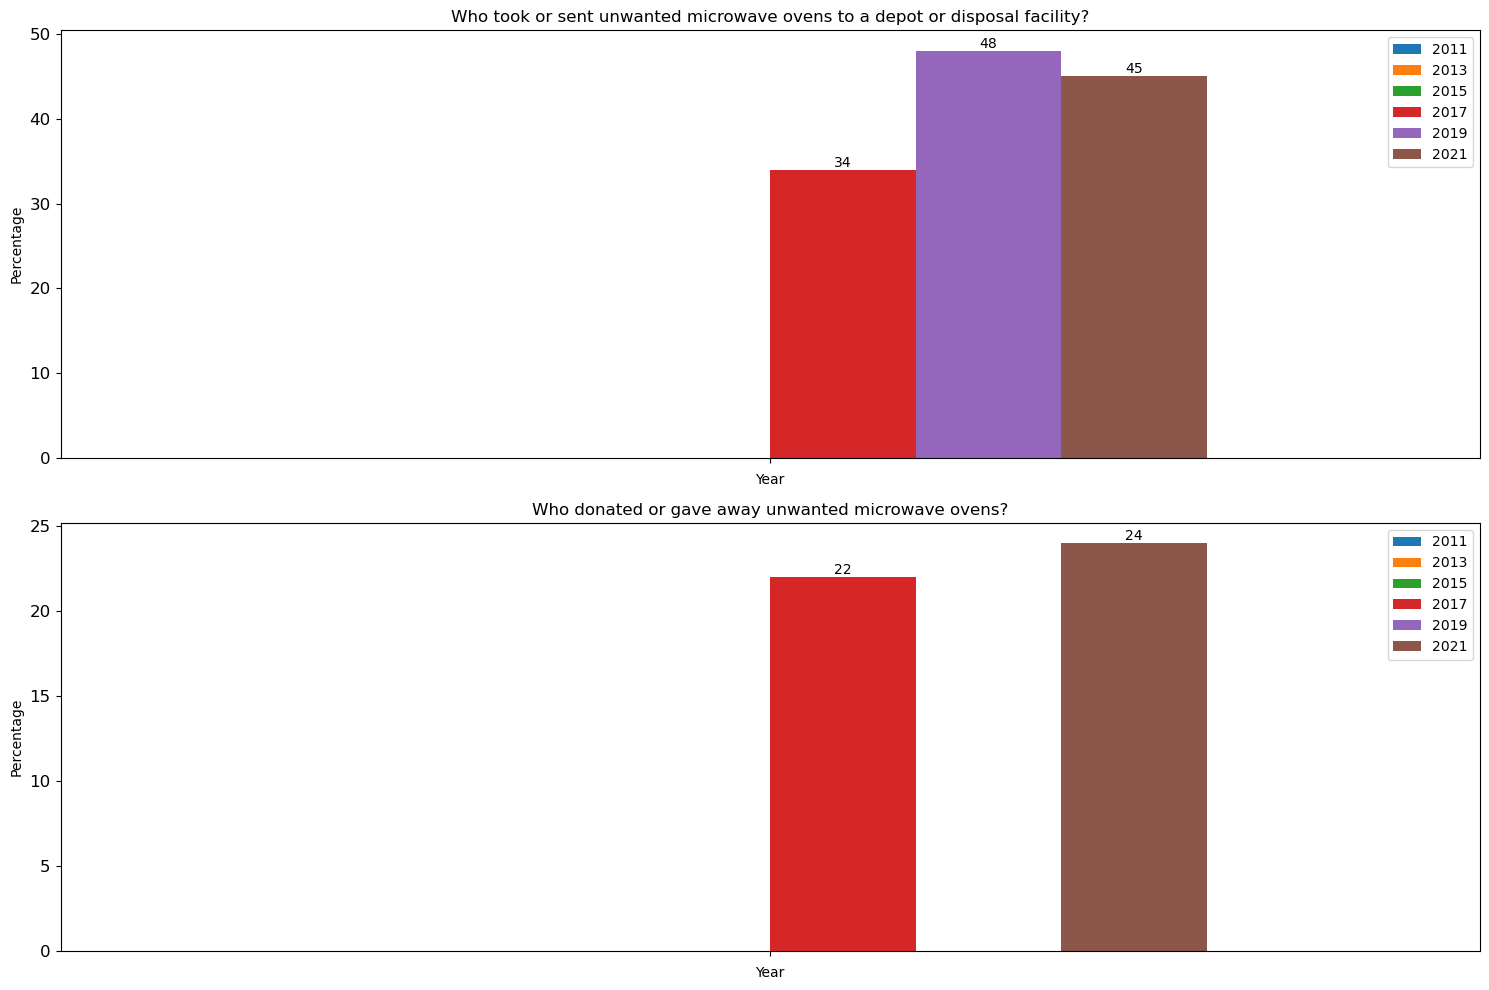

In [30]:
# Create subplots for Plots 2 to 3
fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(15, 10))

# Plot 2: Bar graph for Montrealers who took or sent unwanted microwave ovens to a depot or disposal facility
took_or_sent = microwave_oven[microwave_oven['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted microwave ovens to a depot or disposal facility?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who donated or gave away unwanted microwave ovens phones
microwaves_donated = microwave_oven[microwave_oven['field'].str.contains('Donated or gave away')].iloc[:, 1:]
microwaves_donated.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who donated or gave away unwanted microwave ovens?')
add_bar_labels(ax3)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(211)

# Save the combined plot
fig2.savefig(file_path / 'microwave_oven_combined_plot.png')

## Process the electronic-gaming-equipment-related data only

In [31]:
# Get only the electronic-gaming-equipment-related data points
electronic_gaming = e_waste[
    (e_waste['field'].str.contains('electronic gaming equipment')) & 
    (e_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

electronic_gaming

,field,2011,2013,2015,2017,2019,2021
0,Had unwanted electronic gaming equipment to di...,2.0,3.0,3.0,3.0,4.0,3.0
1,Took or sent unwanted electronic gaming equipm...,NaN,NaN,NaN,NaN,NaN,52.0


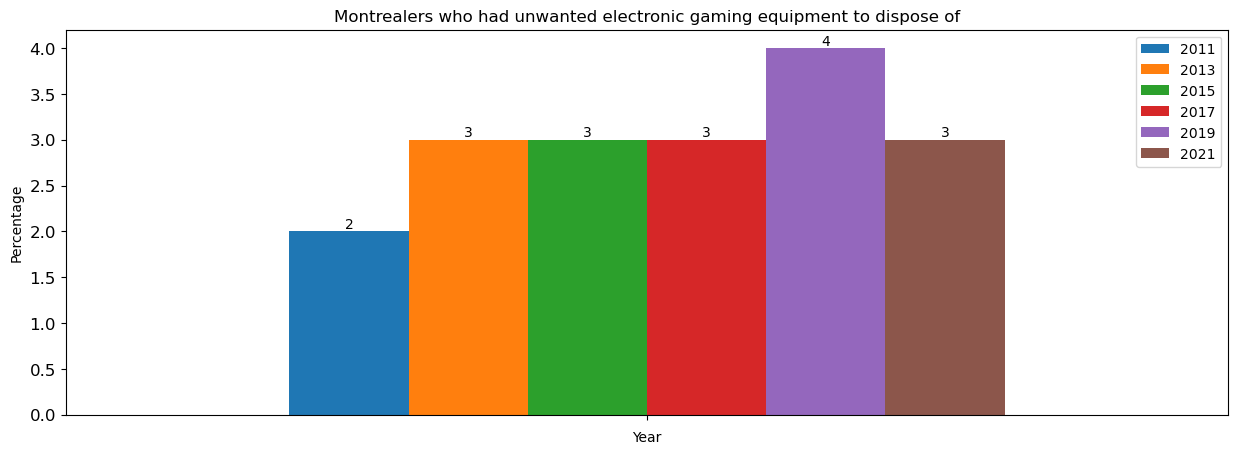

In [32]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph for Montrealers who had unwanted electronic gaming equipment to dispose of
had_unwanted = electronic_gaming[electronic_gaming['field'] == 'Had unwanted electronic gaming equipment to dispose of'].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted electronic gaming equipment to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'electronic_gaming_main_plot.png')  

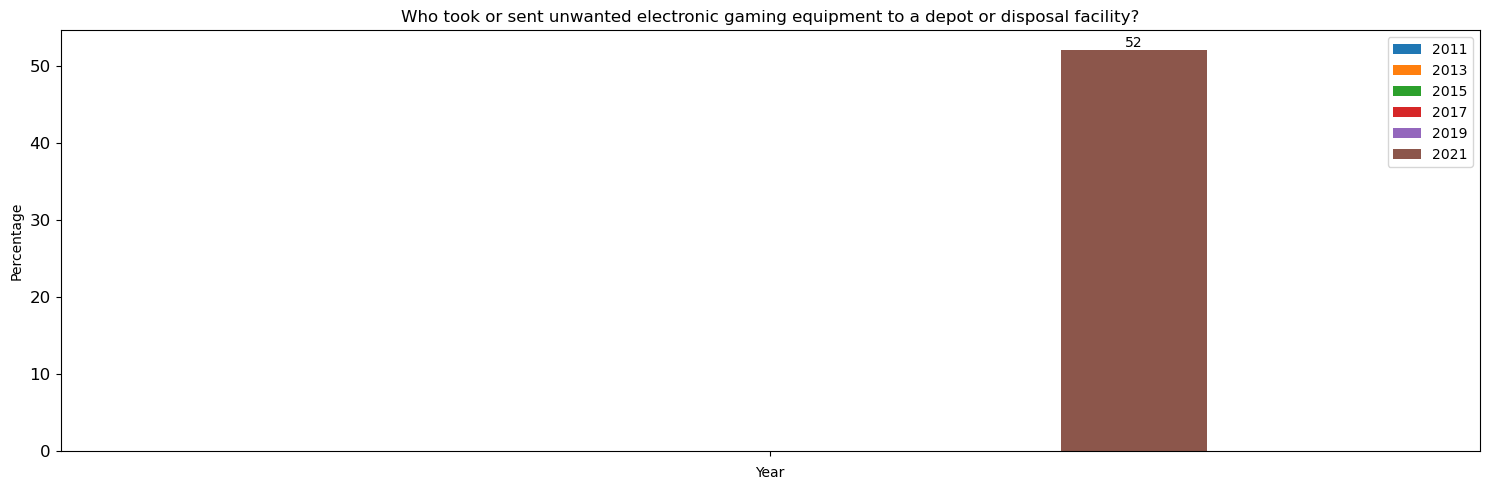

In [33]:
# Create subplots for Plot 2
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 5))

# Plot 2: Bar graph for Montrealers who took or sent unwanted electronic gaming equipment to a depot or disposal facility
took_or_sent = electronic_gaming[electronic_gaming['field'].str.contains('drop-off centre')].iloc[:, 1:]
took_or_sent.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who took or sent unwanted electronic gaming equipment to a depot or disposal facility?')
add_bar_labels(ax2)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(111)

# Save the combined plot
fig2.savefig(file_path / 'electronic_gaming_combined_plot.png')